<a href="https://colab.research.google.com/github/StillWork/book6/blob/master/g_26_%EC%88%98%EC%A0%95_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 로드

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


## MNIST 이미지 확인 및 데이터 전처리

<function matplotlib.pyplot.show>

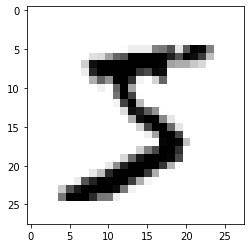

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show

In [4]:
train_images.shape

(60000, 28, 28)

In [0]:
train_images = train_images.reshape((-1, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((-1, 28*28))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## MLP 로 구현(케라스 사용)

In [10]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape = (28*28,)))
model.add(layers.Dense(100, activation='relu'))
# 아래는 반드시 삭제해야 함 MLP는 처음부터 벡터를 입력으로 사용하므로
# model.add(layers.Flatten()) 
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.2792 - accuracy: 0.9186
Epoch 2/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.1234 - accuracy: 0.9624
Epoch 3/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.0880 - accuracy: 0.9729
Epoch 4/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.0687 - accuracy: 0.9788
Epoch 5/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.0552 - accuracy: 0.9826


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc = ',test_acc)

10000/10000 [==============================] - 1s 113us/step
test_acc =  0.9312


## CNN 모델 생성

- CNN에서는 데이터의 구조를 ndarray 형태로 알려줘야 함
- (샘플수, 샘플의 구조(28,28), 특성수)


In [0]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

In [14]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()   

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

## 훈련

In [0]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=3, batch_size=64)

Epoch 1/3
60000/60000 [==============================] - 12s 203us/step - loss: 1.1686 - accuracy: 0.6305
Epoch 2/3
60000/60000 [==============================] - 7s 121us/step - loss: 0.3704 - accuracy: 0.8860
Epoch 3/3
60000/60000 [==============================] - 7s 122us/step - loss: 0.2157 - accuracy: 0.9344


In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc = ',test_acc)

10000/10000 [==============================] - 1s 111us/step
test_acc =  0.9521999955177307


In [22]:
test_images[0:2]

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

- 검증 데이터 3 샘플의 출력(확률) 보기

In [24]:
model.predict_proba(test_images[0:3])

array([[1.2824091e-07, 6.2624565e-08, 3.1978270e-04, 1.2616541e-04,
        1.0145894e-10, 1.4109711e-06, 3.6605792e-12, 9.9951661e-01,
        3.1010796e-07, 3.5591373e-05],
       [2.5096702e-04, 2.7202826e-04, 9.9758983e-01, 1.2560580e-04,
        4.6066102e-11, 3.4654739e-05, 1.4974759e-03, 1.2132768e-11,
        2.2955101e-04, 1.3939549e-12],
       [1.4046406e-05, 9.9331278e-01, 9.3084446e-04, 2.8231024e-04,
        2.7454924e-04, 3.3404469e-04, 2.3261781e-03, 1.1943608e-03,
        1.2767537e-03, 5.4113789e-05]], dtype=float32)

- 검증 데이터 3 샘플의 값이 7, 2, 1인 것을 확인

In [25]:
test_labels[0:3]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

- 가장 확률이 높은 값 위치 찾기 (argmax)

In [27]:
import numpy as np
np.argmax(test_labels[0:3],1)

array([7, 2, 1])